In [17]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np


In [2]:
# load sounds
sound_file = "piano_c.wav"
sound, sr = librosa.load(sound_file)  # sr: sampling rate


In [3]:
ipd.Audio(sound_file)


Text(0.5, 1.0, 'Sound')

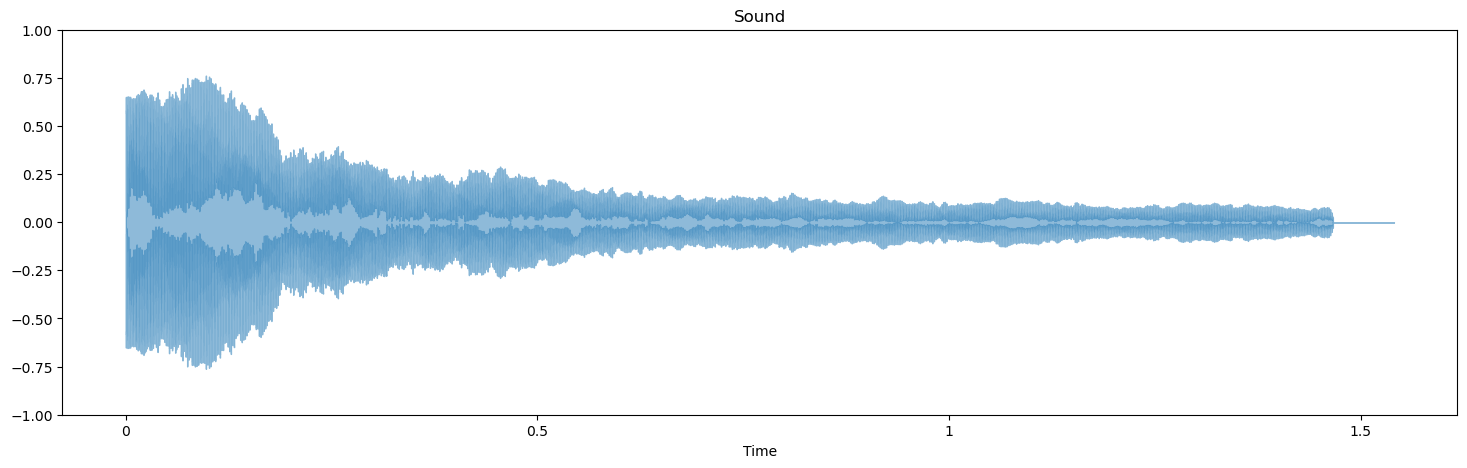

In [4]:
# Visualising audio signal in the time domain
plt.figure(figsize=(18, 5))
librosa.display.waveshow(sound, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Sound")


In [5]:
# Task 1
def amplitude_envelope(signal, frame_size, hop_length) -> np.ndarray:
    # Compute the short-time Fourier transform (STFT) of the signal
    stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop_length)
    
    # Compute the magnitude of the STFT
    magnitude = np.abs(stft)
    
    # Compute the amplitude envelope by taking the maximum magnitude in each frame
    amplitude_env = np.max(magnitude, axis=0)
    
    return amplitude_env

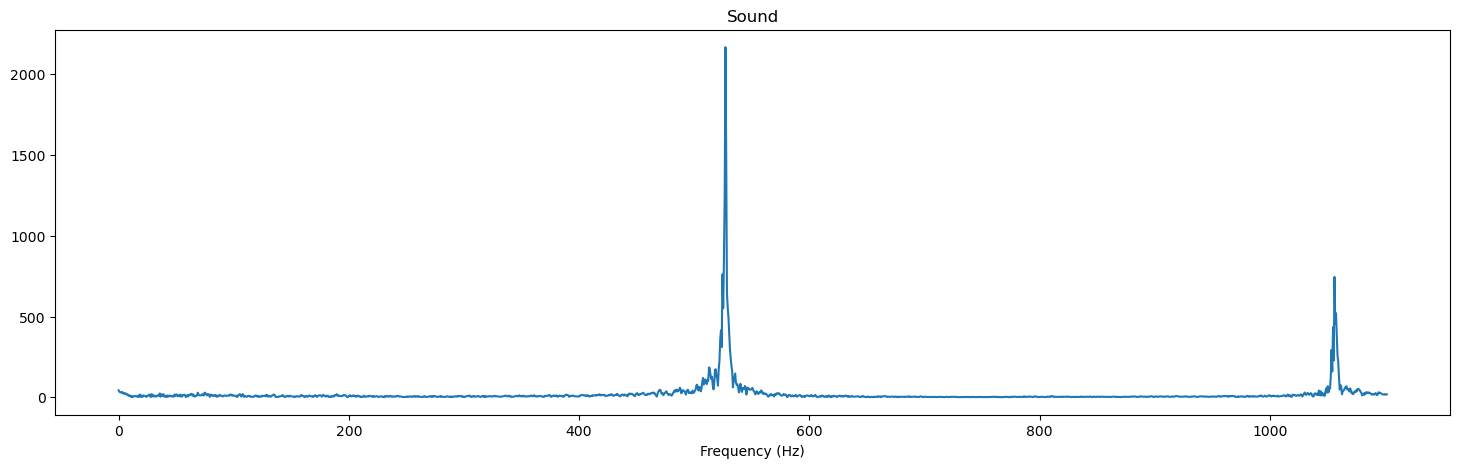

In [6]:
# Task 2
# Visualising audio signal in the frequency domain
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    """Time domain -> Frequency domain"""
    
    # Check if signal is empty or None
    if signal is None or len(signal) == 0:
        raise ValueError("Signal cannot be empty or None")
    
    # Calculate the Fourier Transform of the signal
    X = np.fft.fft(signal)
    X_mag = np.abs(X)
    
    # Only plot the first half of the spectrum (since FFT results are symmetric)
    n = len(X_mag)
    X_mag = X_mag[:n // 2]
    f = np.linspace(0, sr / 2, len(X_mag))
    
    # Ensure f_ratio is within valid range
    if f_ratio <= 0 or f_ratio > 1:
        raise ValueError("f_ratio must be between 0 and 1")
    
    f_bins = int(len(X_mag) * f_ratio)

    # Make a plot
    plt.figure(figsize=(18, 5))
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)
    plt.show()

plot_magnitude_spectrum(sound, sr, "Sound", 0.1)

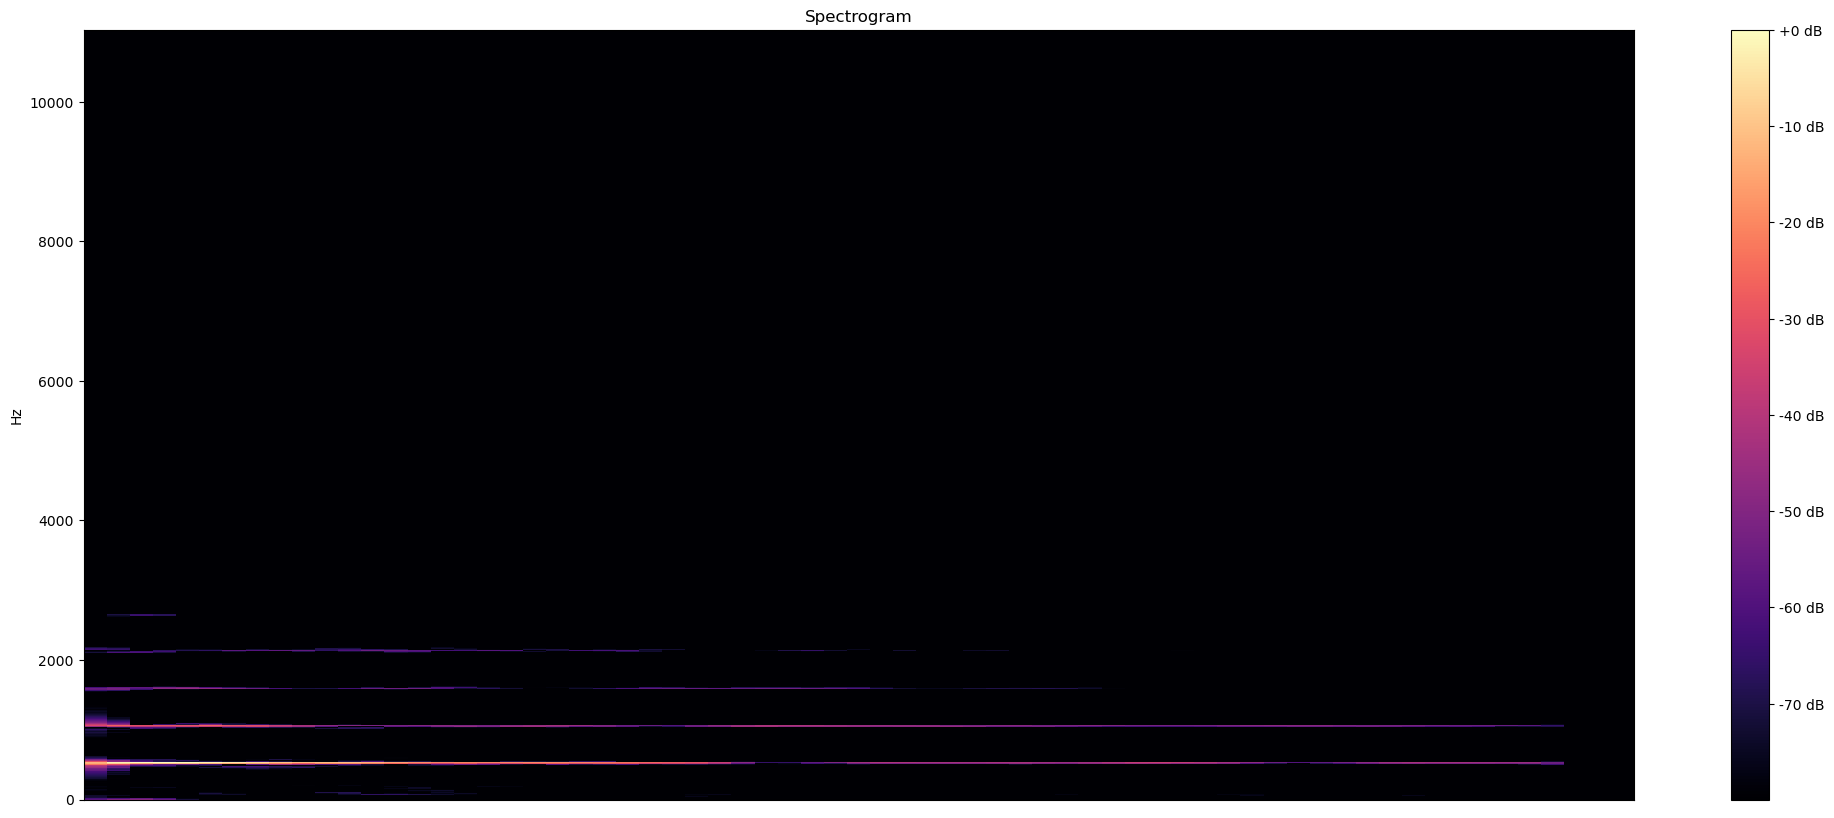

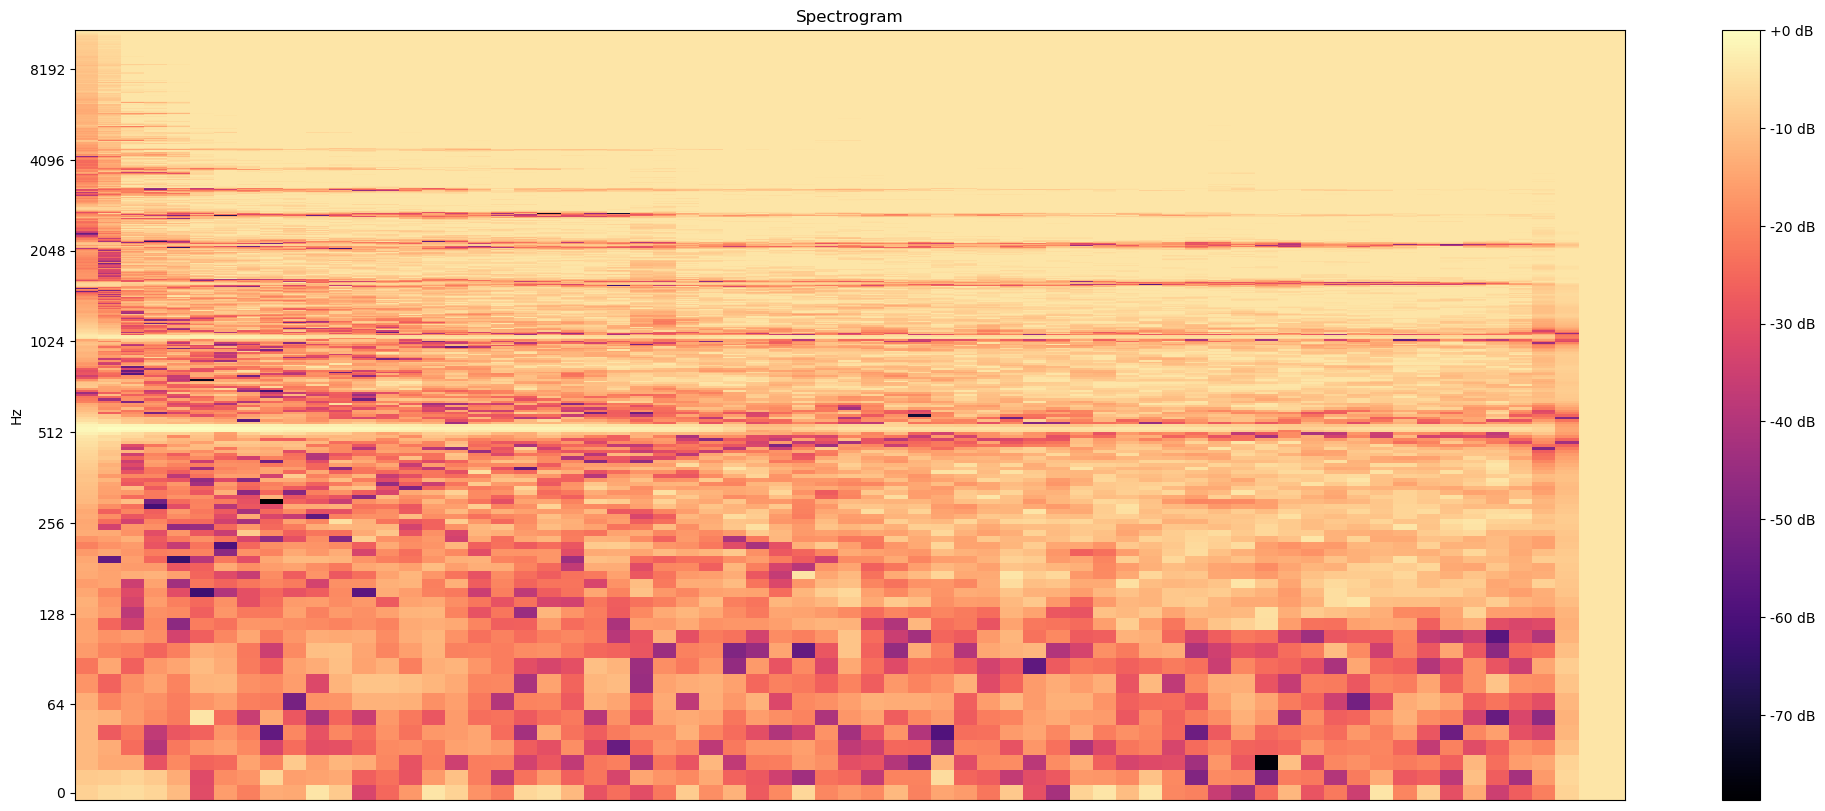

In [15]:
# Task 3
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    """Visualizing the spectrogram"""
    plt.figure(figsize=(25, 10))
    # Hint: y_axis choice: "linear", "log"
    # Hint: use librosa.display.specshow()
    librosa.display.specshow(librosa.amplitude_to_db(Y, ref=np.max), sr=sr, hop_length=hop_length, y_axis=y_axis)
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.show()


FRAME_SIZE = 2048
HOP_SIZE = 512
S_scale = librosa.stft(sound, n_fft=FRAME_SIZE, hop_length=HOP_SIZE) # Extracting Short-Time Fourier Transform
Y_scale = np.abs(S_scale) ** 2 # Calculating the spectrogram
plot_spectrogram(Y_scale, sr, HOP_SIZE) # Visualizing the spectrogram
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE,y_axis='log') # Log-Frequency Spectrogram


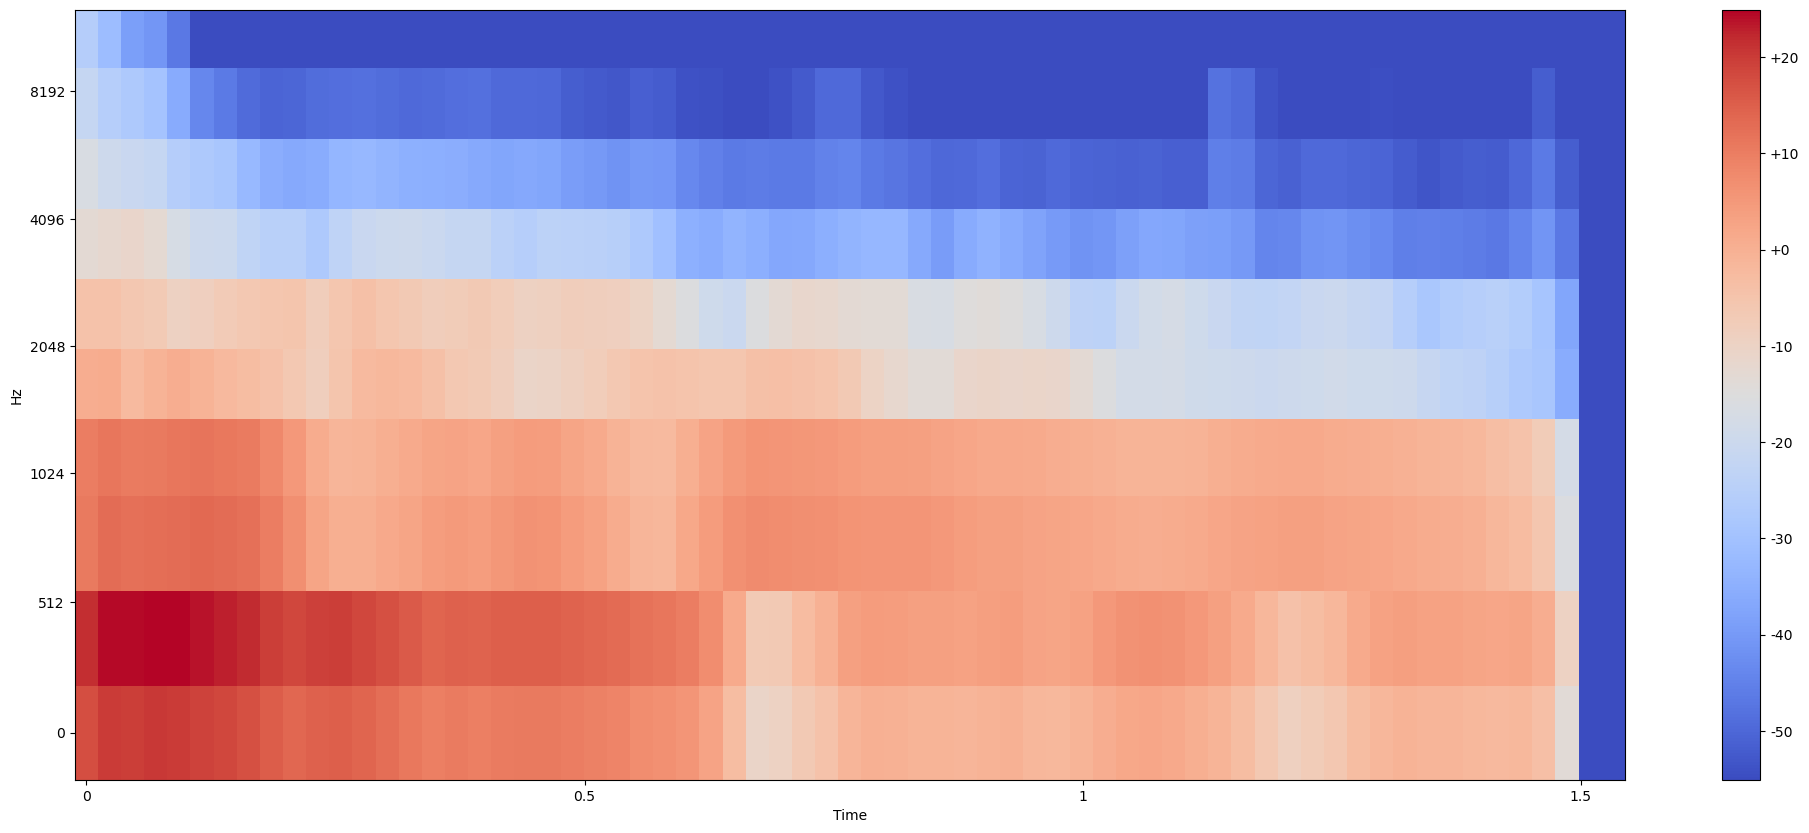

In [16]:
# Visualizing Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(
    y=sound, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.0f")
plt.show()


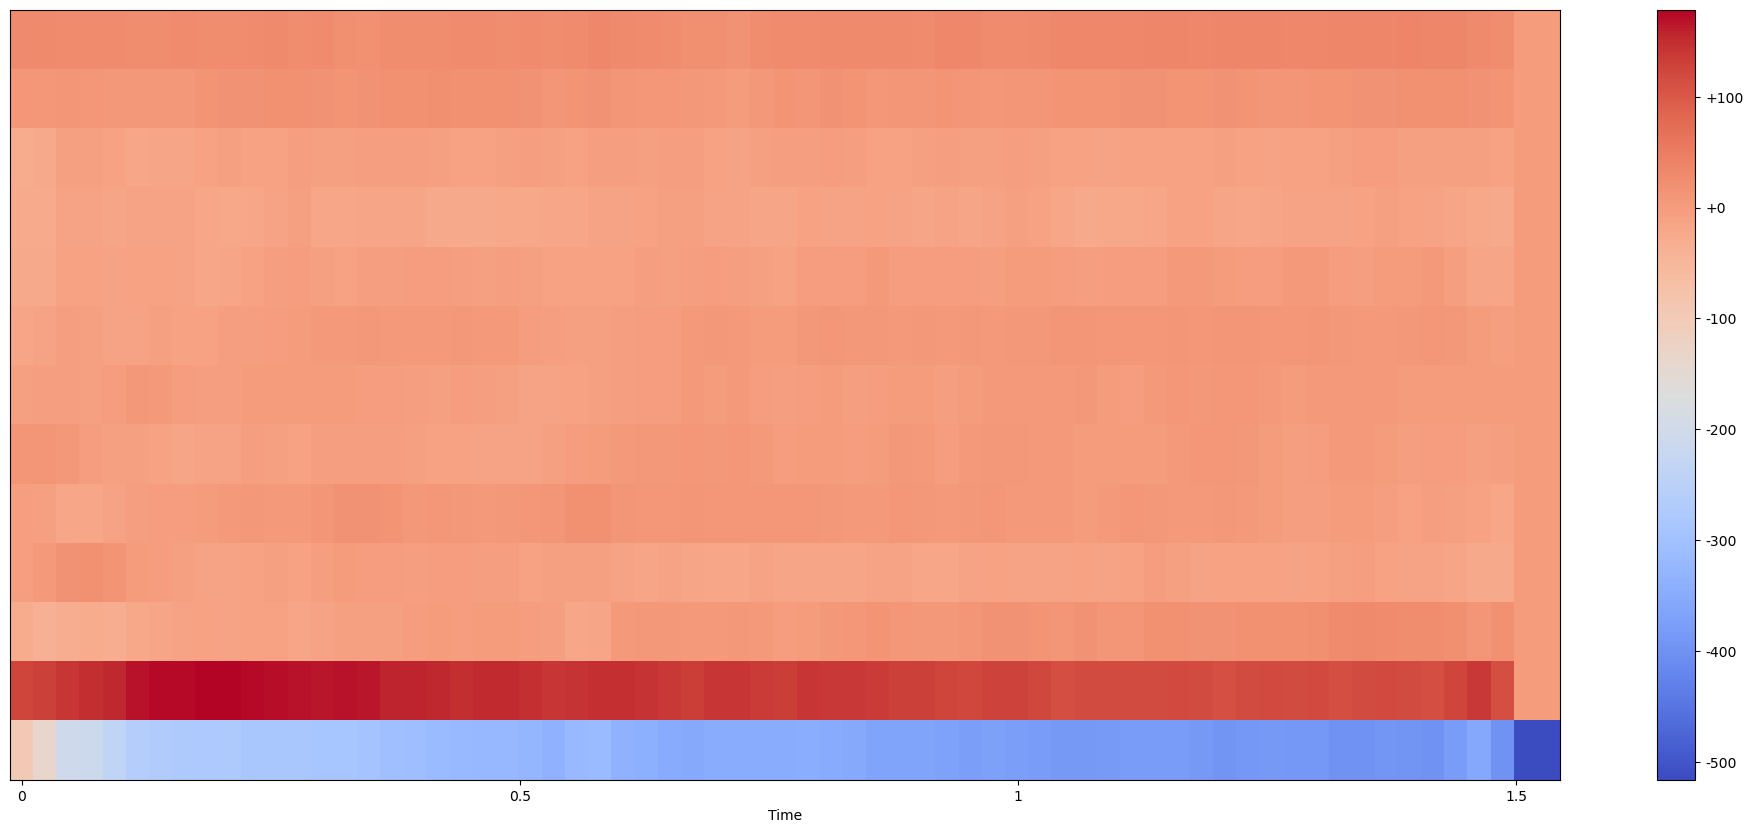

In [9]:
# Task 4
# Visualising MFCCs
def plot_mfccs(Y, sr, n_mfcc=13):
    # Hint: extract mfccs, use librosa.feature.mfcc()
    mfccs = librosa.feature.mfcc(y=Y, sr=sr, n_mfcc=n_mfcc)        # need to be modified

    
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(mfccs,
                             x_axis="time",
                             sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()

plot_mfccs(sound, sr)